In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("finance.csv", encoding="ISO-8859-1")
print(df.shape)
df.head()

(50000, 7)


,TransactionID,CustomerID,TransactionDate,Amount,TransactionType,Merchant,Balance
0,1,8989,01-01-2018 00:00,1576.73,Credit,Uber,1576.73
1,2,5277,01-01-2018 01:00,7390.34,Debit,Target,7390.34
2,3,8956,01-01-2018 02:00,8904.52,Credit,BestBuy,8904.52
3,4,9036,01-01-2018 03:00,5602.09,Credit,Netflix,5602.09
4,5,6473,01-01-2018 04:00,7369.77,Credit,Starbucks,7369.77


In [2]:
# missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50000 non-null  int64  
 1   CustomerID       50000 non-null  int64  
 2   TransactionDate  50000 non-null  object 
 3   Amount           50000 non-null  float64
 4   TransactionType  50000 non-null  object 
 5   Merchant         50000 non-null  object 
 6   Balance          50000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.7+ MB


TransactionID      0
CustomerID         0
TransactionDate    0
Amount             0
TransactionType    0
Merchant           0
Balance            0
dtype: int64

In [3]:
# Summary stats
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,50000.0,NaN,NaN,NaN,25000.5,14433.901067,1.0,12500.75,25000.5,37500.25,50000.0
CustomerID,50000.0,NaN,NaN,NaN,7504.42486,1447.822607,5000.0,6251.0,7515.0,8761.0,9999.0
TransactionDate,50000,50000,01-01-2018 00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,50000.0,NaN,NaN,NaN,4990.46013,2884.58313,5.02,2481.4875,4984.16,7470.21,9999.36
TransactionType,50000,2,Credit,25096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchant,50000,8,Apple Store,6314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance,50000.0,NaN,NaN,NaN,29958.724365,19469.174051,8.31,14266.9375,27180.955,42570.5625,136235.43


In [4]:
# Convert TransactionDate to datetime for analysis
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['YearMonth'] = df['TransactionDate'].dt.to_period('M')

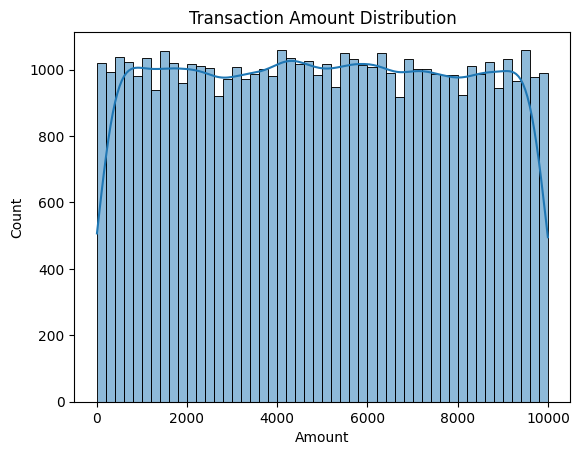

In [5]:
# Transaction amount distribution
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

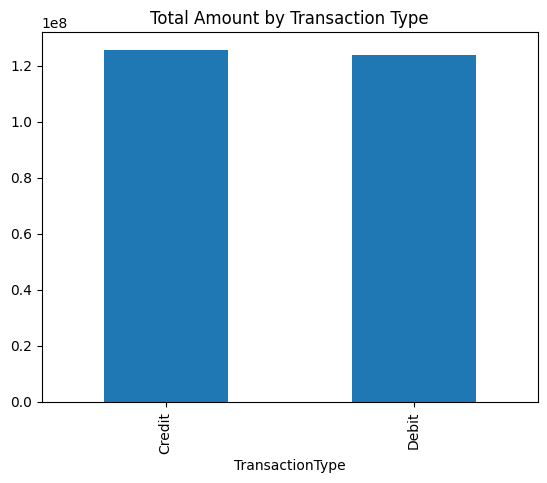

TransactionType
Credit    1.256697e+08
Debit     1.238533e+08
Name: Amount, dtype: float64

In [6]:
# Credit vs Debit totals
trans_type = df.groupby('TransactionType')['Amount'].sum().sort_values(ascending=False)
trans_type.plot(kind='bar')
plt.title('Total Amount by Transaction Type')
plt.show()
trans_type

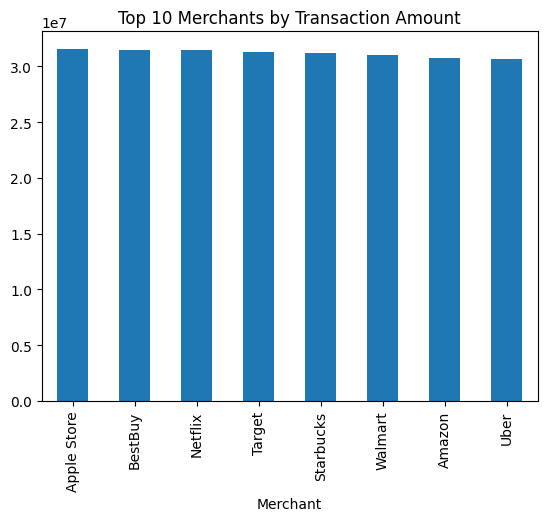

Merchant
Apple Store    31565526.87
BestBuy        31501575.91
Netflix        31468690.96
Target         31318329.67
Starbucks      31210662.65
Walmart        31021830.39
Amazon         30771627.18
Uber           30664762.88
Name: Amount, dtype: float64

In [7]:
# Top Merchants by total transaction amount
top_merchants = df.groupby('Merchant')['Amount'].sum().sort_values(ascending=False).head(10)
top_merchants.plot(kind='bar')
plt.title('Top 10 Merchants by Transaction Amount')
plt.show()
top_merchants

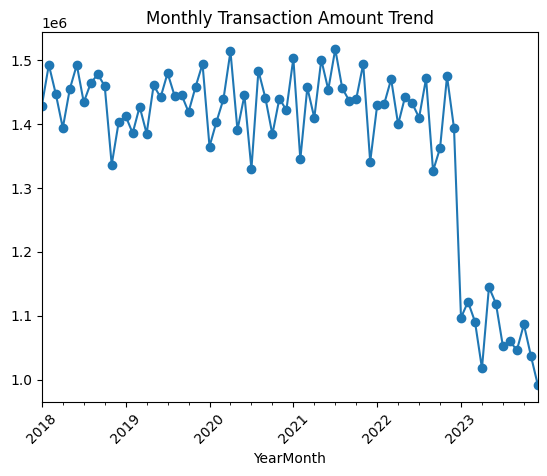

YearMonth
2018-01    1428860.37
2018-02    1492623.77
2018-03    1446928.03
2018-04    1393892.78
2018-05    1454638.28
              ...    
2023-08    1060094.48
2023-09    1046415.47
2023-10    1086653.99
2023-11    1037781.42
2023-12     991704.62
Freq: M, Name: Amount, Length: 72, dtype: float64

In [8]:
# Monthly transaction trends
monthly = df.groupby('YearMonth')['Amount'].sum()
monthly.plot(kind='line', marker='o')
plt.title('Monthly Transaction Amount Trend')
plt.xticks(rotation=45)
plt.show()
monthly